In [ ]:
conda install -c anaconda mysql-connector-python

In [17]:
import mysql.connector
import pandas as pd

In [3]:
startalent_db = mysql.connector.connect(host = 'localhost', user = 'root', password = 'pooja1234', database = 'startalent')

In [33]:
curr_cursor = startalent_db.cursor()

In [41]:
# Query to select all clients who are assisted by agents with agent ID "2" and "4"

curr_cursor.execute('SELECT * FROM Client WHERE AgentID IN (2, 4);')
for record in curr_cursor:
    print(record)

(2, 'Bob Smith', 35, 'Male', 'bob.smith@email.com', '555-5678', 8, 'Epic Productions', 2, 2)
(42, 'Preston Murphy', 31, 'Male', 'preston.murphy@email.com', '555-6789', 12, 'Elysium Films', 8, 2)
(4, 'David Wilson', 42, 'Male', 'david.wilson@email.com', '555-3456', 10, 'Majestic Studios', 4, 4)
(43, 'Quinn Hayes', 37, 'Female', 'quinn.hayes@email.com', '555-1234', 19, 'Radiance Productions', 1, 4)


In [42]:
# Query to select clients with a rating greater than 4.3 stars

query = """SELECT
    c.ClientID,
    c.Name AS ClientName
FROM
    Client c
JOIN
    JobHistory jh ON c.JobHistID = jh.JobHistID
JOIN
    Job j ON jh.JobID = j.JobID
JOIN
    Reviews r ON j.JobID = r.JobID
WHERE
    r.StarRating > 4.3;
"""

curr_cursor.execute(query)
for record in curr_cursor:
    print(record)

(4, 'David Wilson')
(8, 'Henry Anderson')
(17, 'Quinn Powell')
(21, 'Ursula Ross')
(26, 'Zane Powell')
(31, 'Eva Turner')
(36, 'James Powell')
(40, 'Noah Fisher')
(45, 'Sophie Powell')
(50, 'Xavier Turner')
(4, 'David Wilson')
(8, 'Henry Anderson')
(17, 'Quinn Powell')
(21, 'Ursula Ross')
(26, 'Zane Powell')
(31, 'Eva Turner')
(36, 'James Powell')
(40, 'Noah Fisher')
(45, 'Sophie Powell')
(50, 'Xavier Turner')
(1, 'Alice Johnson')
(6, 'Frank Turner')
(11, 'Karen Green')
(15, 'Olivia Ward')
(19, 'Samantha Brooks')
(24, 'Xander Hayes')
(29, 'Catherine Brown')
(33, 'Giselle Fisher')
(38, 'Liam Murphy')
(43, 'Quinn Hayes')
(47, 'Uma Turner')
(1, 'Alice Johnson')
(6, 'Frank Turner')
(11, 'Karen Green')
(15, 'Olivia Ward')
(19, 'Samantha Brooks')
(24, 'Xander Hayes')
(29, 'Catherine Brown')
(33, 'Giselle Fisher')
(38, 'Liam Murphy')
(43, 'Quinn Hayes')
(47, 'Uma Turner')
(1, 'Alice Johnson')
(6, 'Frank Turner')
(11, 'Karen Green')
(15, 'Olivia Ward')
(19, 'Samantha Brooks')
(24, 'Xander Haye

In [44]:
# Query to select all clients whose contracts started before January 2022.

query = """SELECT DISTINCT C.ClientID, C.Name AS ClientName
FROM Client C
JOIN Contract CT ON C.ClientID = CT.ClientID
WHERE CT.startDate < '2022-01-01';
"""

curr_cursor.execute(query)
for record in curr_cursor:
    print(record)

(3, 'Charlie Davis')
(8, 'Henry Anderson')
(13, 'Mia Turner')
(18, 'Robert Turner')
(28, 'Benjamin Hayes')
(33, 'Giselle Fisher')
(38, 'Liam Murphy')
(48, 'Vincent Murphy')


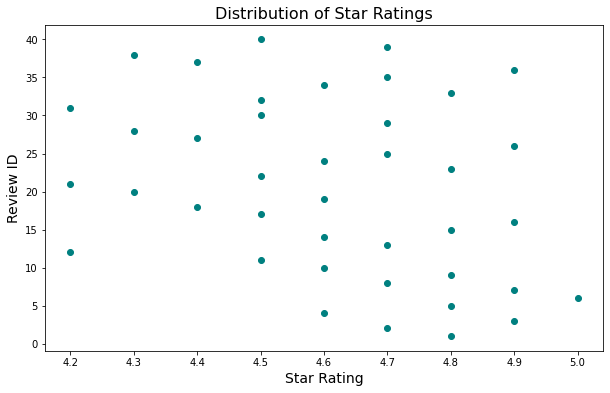

In [51]:
# A Scatter plot to show the distribution of Ratings

import matplotlib.pyplot as plt

query = """select ReviewID, StarRating from Reviews;"""
query1_df = pd.read_sql(query, startalent_db)

plt.figure(figsize = (10,6))
plt.scatter(query1_df.StarRating, query1_df.ReviewID, c = 'teal')
plt.title('Distribution of Star Ratings', fontsize = 16)
plt.xlabel('Star Rating', fontsize = 14)
plt.ylabel('Review ID', fontsize = 14)
plt.show()

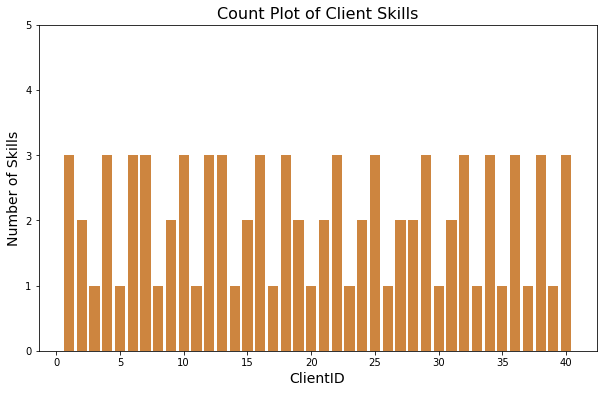

In [61]:
# A Bar plot to show the skills each client possesses
import seaborn as sns

query = """select ClientID, count(*) as Number_of_skills
from clientskills
group by ClientID;"""
query2_df = pd.read_sql(query, startalent_db)

plt.figure(figsize = (10,6))
plt.bar(query2_df.ClientID, query2_df.Number_of_skills, color = 'peru')
plt.title('Count Plot of Client Skills', fontsize = 16)
plt.ylim(0,5)
plt.xlabel('ClientID', fontsize = 14)
plt.ylabel('Number of Skills', fontsize = 14)
plt.show()


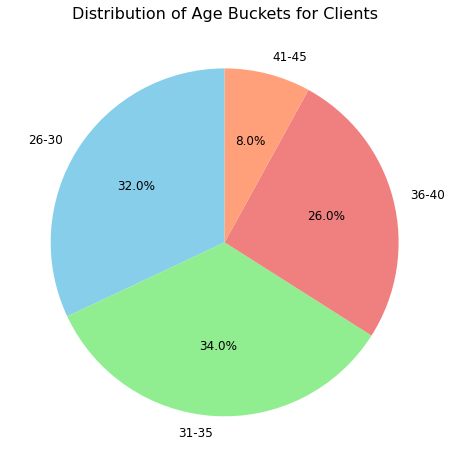

In [71]:
# Pie chart to show the composition of Ages of Clients

query = """select ClientID, Age
from client;"""
query3_df = pd.read_sql(query, startalent_db)

age_buckets = {
    '26-30': range(26, 31),
    '31-35': range(31, 36),
    '36-40': range(36, 41),
    '41-45': range(41, 46),
}

# Categorize ages into buckets
categorized_ages = {bucket: sum(1 for a in query3_df.Age if a in range_) for bucket, range_ in age_buckets.items()}

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(categorized_ages.values(), labels=categorized_ages.keys(), autopct='%1.1f%%',\
        startangle=90, colors=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'gold'],\
        textprops={'fontsize': 12})
plt.title('Distribution of Age Buckets for Clients', fontsize = 16)
plt.show()